In [5]:
from keras.models import load_model

# Load CNN model (for road blockage detection)
cnn_model = load_model(r'D:/jupyter_nbk_project/cnn/dataset/cnn_model.h5')

# Load LSTM model (for traffic volume prediction)
lstm_model = load_model(r'D:/jupyter_nbk_project/disaster_relief_ai/notebooks/traffic_forecast_model.h5')


In [6]:
print("CNN Model Loaded Successfully:")
cnn_model.summary()

print("\nLSTM Model Loaded Successfully:")
lstm_model.summary()


CNN Model Loaded Successfully:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,179 (6.20 MB)

 Trainable params: 1,625,729 (6.20 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)


LSTM Model Loaded Successfully:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 10, 50)              │          12,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,453 (126.77 KB)

 Trainable params: 32,451 (126.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [14]:
print(lstm_model.input_shape)


(None, 10, 10)


In [53]:
import numpy as np

# Example dummy image input (must match training shape: e.g., 64x64x3)
dummy_image = np.random.rand(1, 64, 64, 3)  # (batch_size, height, width, channels)

# Predict
cnn_result = cnn_model.predict(dummy_image)
print("CNN Prediction (Road Blocked = 0 / Not Blocked = 1):", cnn_result)

import numpy as np

# Create dummy input: batch_size=1, timesteps=10, features=10
dummy_series = np.random.rand(1, 10, 10)

# Predict using the LSTM model
lstm_result = lstm_model.predict(dummy_series)
print("LSTM Prediction (Traffic Volume):", lstm_result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
CNN Prediction (Road Blocked = 0 / Not Blocked = 1): [[0.01089275]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
LSTM Prediction (Traffic Volume): [[0.5560144]]


In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load models
cnn_model = load_model(r'D:/jupyter_nbk_project/cnn/dataset/cnn_model.h5')
lstm_model = load_model(r'D:/jupyter_nbk_project/disaster_relief_ai/notebooks/traffic_forecast_model.h5')

# --- CNN Prediction ---
img_path = r'D:/jupyter_nbk_project/dataset/train/NotBlocked/Not_Blocked-418-_png.rf.14d8b3b90f72fe8f1104b3f0e732f9b4.jpg'
img = image.load_img(img_path, target_size=(64, 64))  # Match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Class indices
class_indices = {'Blocked': 0, 'NotBlocked': 1}
index_to_label = {v: k for k, v in class_indices.items()}

# Prediction
cnn_result = cnn_model.predict(img_array)
print("CNN Raw Prediction:", cnn_result)

# If sigmoid activation (single output)
predicted_class_index = 1 if cnn_result[0][0] > 0.5 else 0
cnn_label = index_to_label[predicted_class_index]

print("CNN Classification:", cnn_label)
# --- LSTM Prediction ---
csv_path = r'D:/jupyter_nbk_project/disaster_relief_ai/data/merged/final_dataset.csv'
df = pd.read_csv(csv_path)

features = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
            'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
            'Wind Speed (km/h)', 'Pressure (millibars)']

if not all(col in df.columns for col in features):
    raise ValueError("Some required feature columns are missing in the CSV file.")

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

time_steps = 10
input_sequence = scaled_data[-time_steps:].reshape(1, time_steps, len(features))

lstm_result = lstm_model.predict(input_sequence)
print("LSTM Scaled Prediction (Traffic Volume):", lstm_result)

# Optional: inverse transform traffic volume
scaler_traffic = MinMaxScaler()
traffic_scaled = scaler_traffic.fit_transform(df[['traffic_volume']])
predicted_real_value = scaler_traffic.inverse_transform(lstm_result)
print("LSTM Real Traffic Volume Prediction:", predicted_real_value)
# After your prediction code...

print("LSTM Real Traffic Volume Prediction:", predicted_real_value)

# Define threshold for traffic volume
traffic_threshold = 500  # adjust this threshold as appropriate

# Decision making
if cnn_label == "Blocked":
    final_decision = "Road is BLOCKED – Do NOT dispatch. Consider rerouting."
elif cnn_label == "NotBlocked" and predicted_real_value[0][0] > traffic_threshold:
    final_decision = "Road is OPEN, but traffic is HIGH – Dispatch with caution."
elif cnn_label == "NotBlocked" and predicted_real_value[0][0] <= traffic_threshold:
    final_decision = "Road is OPEN and traffic is LOW – Safe to dispatch."

print("Final Decision:", final_decision)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
CNN Raw Prediction: [[0.9999972]]
CNN Classification: NotBlocked
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
LSTM Scaled Prediction (Traffic Volume): [[0.08958688]]
LSTM Real Traffic Volume Prediction: [[639.6649]]
LSTM Real Traffic Volume Prediction: [[639.6649]]
Final Decision: Road is OPEN, but traffic is HIGH – Dispatch with caution.


In [33]:
print("Expected CNN input shape:", cnn_model.input_shape)


Expected CNN input shape: (None, 64, 64, 3)


In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load models
cnn_model = load_model(r'D:/jupyter_nbk_project/cnn/dataset/cnn_model.h5')
lstm_model = load_model(r'D:/jupyter_nbk_project/disaster_relief_ai/notebooks/traffic_forecast_model.h5')

# --- CNN Prediction ---
img_path = r'D:/jupyter_nbk_project/dataset/test/Blocked/Blocked-66-_png.rf.585d06d02fc58ee4c396fc5d4d34f0a3.jpg'
img = image.load_img(img_path, target_size=(64, 64))  # Match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Class indices
class_indices = {'Blocked': 0, 'NotBlocked': 1}
index_to_label = {v: k for k, v in class_indices.items()}

# Prediction
cnn_result = cnn_model.predict(img_array)
print("CNN Raw Prediction:", cnn_result)

# If sigmoid activation (single output)
predicted_class_index = 1 if cnn_result[0][0] > 0.5 else 0
cnn_label = index_to_label[predicted_class_index]

print("CNN Classification:", cnn_label)
# --- LSTM Prediction ---
csv_path = r'D:/jupyter_nbk_project/disaster_relief_ai/data/merged/final_dataset.csv'
df = pd.read_csv(csv_path)

features = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
            'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
            'Wind Speed (km/h)', 'Pressure (millibars)']

if not all(col in df.columns for col in features):
    raise ValueError("Some required feature columns are missing in the CSV file.")

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

time_steps = 10
input_sequence = scaled_data[-time_steps:].reshape(1, time_steps, len(features))

lstm_result = lstm_model.predict(input_sequence)
print("LSTM Scaled Prediction (Traffic Volume):", lstm_result)

# Optional: inverse transform traffic volume
scaler_traffic = MinMaxScaler()
traffic_scaled = scaler_traffic.fit_transform(df[['traffic_volume']])
predicted_real_value = scaler_traffic.inverse_transform(lstm_result)
print("LSTM Real Traffic Volume Prediction:", predicted_real_value)
# After your prediction code...

print("LSTM Real Traffic Volume Prediction:", predicted_real_value)

# Define threshold for traffic volume
traffic_threshold = 500  # adjust this threshold as appropriate

# Decision making
if cnn_label == "Blocked":
    final_decision = "Road is BLOCKED – Do NOT dispatch. Consider rerouting."
elif cnn_label == "NotBlocked" and predicted_real_value[0][0] > traffic_threshold:
    final_decision = "Road is OPEN, but traffic is HIGH – Dispatch with caution."
elif cnn_label == "NotBlocked" and predicted_real_value[0][0] <= traffic_threshold:
    final_decision = "Road is OPEN and traffic is LOW – Safe to dispatch."

print("Final Decision:", final_decision)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
CNN Raw Prediction: [[8.755058e-06]]
CNN Classification: Blocked
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
LSTM Scaled Prediction (Traffic Volume): [[0.08958688]]
LSTM Real Traffic Volume Prediction: [[639.6649]]
LSTM Real Traffic Volume Prediction: [[639.6649]]
Final Decision: Road is BLOCKED – Do NOT dispatch. Consider rerouting.


Edge Weights (Average and Normalized):
Edge ('A', 'B'): Avg Weight = 1030.0, Normalized Risk = 0.001
Edge ('A', 'C'): Avg Weight = 175.0, Normalized Risk = 0.000
Edge ('F', 'D'): Avg Weight = 1000000.0, Normalized Risk = 1.000
Edge ('D', 'E'): Avg Weight = 655.0, Normalized Risk = 0.001
Edge ('E', 'F'): Avg Weight = 65.0, Normalized Risk = 0.000
Edge ('B', 'C'): Avg Weight = 445.0, Normalized Risk = 0.000
Edge ('F', 'C'): Avg Weight = 845.0, Normalized Risk = 0.001
Edge ('D', 'B'): Avg Weight = 446.0, Normalized Risk = 0.000
Edge ('B', 'A'): Avg Weight = 345.0, Normalized Risk = 0.000

Road Segment: ('A', 'B')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
CNN Prediction: NotBlocked
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
LSTM Predicted Traffic: 8.823688745498657

Road Segment: ('A', 'C')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
CNN Prediction: NotBlocked
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
LSTM Predicted Traffic: 8.682794451713562

Road Segment: ('F', 'D')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


C:\Users\shrey\AppData\Local\Temp\ipykernel_26676\2823779771.py:209: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


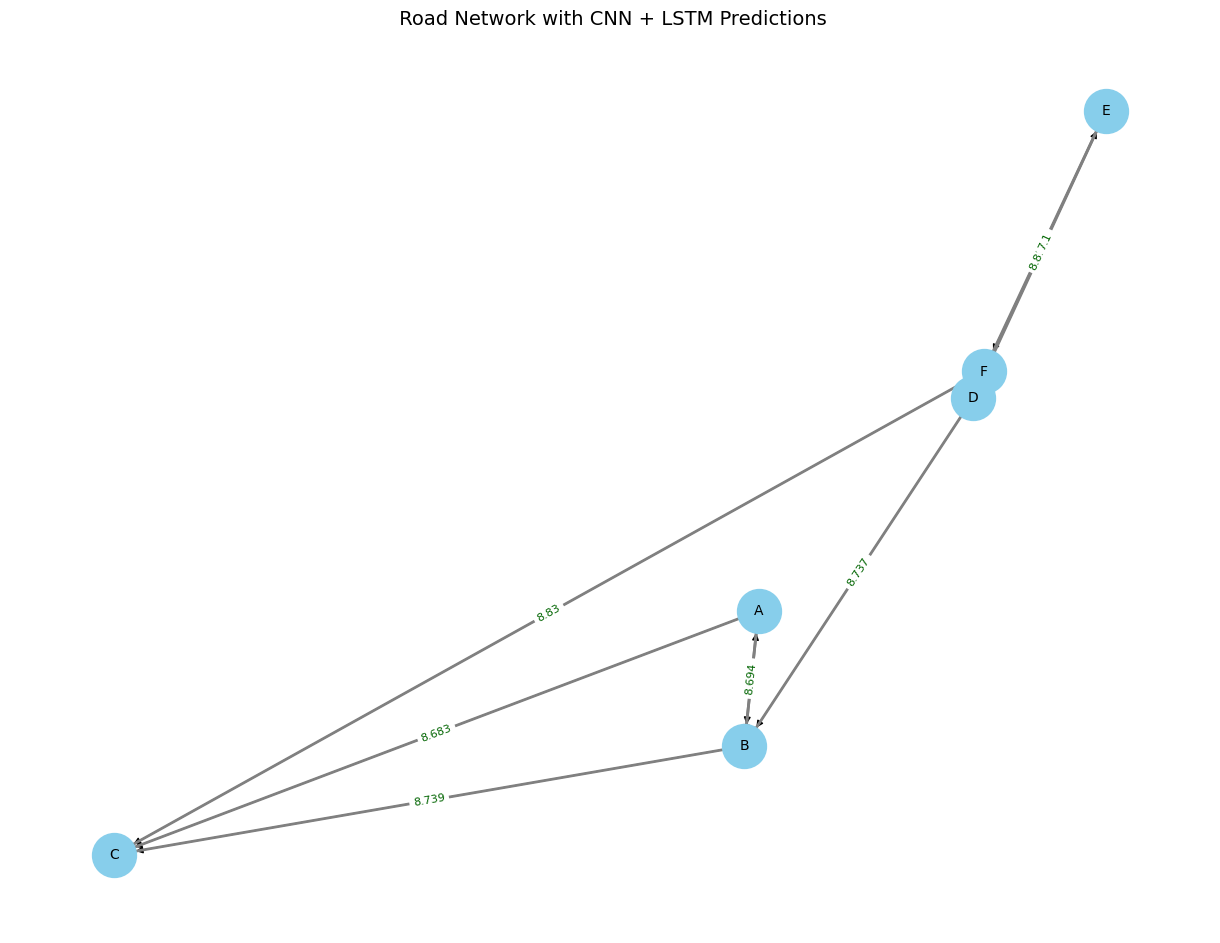

In [203]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# ---- Load Models ----
cnn_model = load_model(r'D:/jupyter_nbk_project/cnn/dataset/cnn_model.h5', compile=False)
lstm_model = load_model(r'D:/jupyter_nbk_project/disaster_relief_ai/notebooks/traffic_forecast_model.h5', compile=False)

class_indices = {'Blocked': 0, 'NotBlocked': 1}
index_to_label = {v: k for k, v in class_indices.items()}

# ---- Dummy Scaler Setup ----
features = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
            'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
            'Wind Speed (km/h)', 'Pressure (millibars)']
scaler = MinMaxScaler()
dummy_data = pd.DataFrame(np.tile(np.arange(10), (10, 1)).T, columns=features)
scaler.fit(dummy_data)

# ---- CNN + LSTM Prediction Function ----
def get_road_conditions(road_segments, cnn_images, traffic_series, threshold=10):
    conditions = {}
    for road in road_segments:
        print(f"\nRoad Segment: {road}")
        img_path = cnn_images[road]
        traffic_history = traffic_series.get(road, [])
        
        # CNN
        img = image.load_img(img_path, target_size=(64, 64))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        
        cnn_result = cnn_model.predict(img_array)
        cnn_pred = 1 if cnn_result[0][0] > 0.5 else 0
        cnn_label = index_to_label[cnn_pred]
        print("CNN Prediction:", cnn_label)

        # LSTM
        if len(traffic_history) < 10:
            print(f"Not enough traffic history for segment {road}")
            predicted_traffic = None
        else:
            last_10 = traffic_history[-10:]
            lstm_df = pd.DataFrame(np.zeros((10, len(features))), columns=features)
            lstm_df['traffic_volume'] = last_10
            input_scaled = scaler.transform(lstm_df)
            input_scaled = input_scaled.reshape(1, input_scaled.shape[0], input_scaled.shape[1])
            lstm_result = lstm_model.predict(input_scaled)

            if lstm_result.ndim == 3:
                last_pred = lstm_result[0, -1, 0]
            elif lstm_result.ndim == 2:
                last_pred = lstm_result[0, -1]
            else:
                last_pred = lstm_result[0]

            zeros_pad = np.zeros((1, len(features) - 1))
            scaled_pred = np.hstack([np.array([[last_pred]]), zeros_pad])
            predicted_traffic = scaler.inverse_transform(scaled_pred)[0][0]
            print(f"LSTM Predicted Traffic: {predicted_traffic}")

        # Store predictions
        conditions[road] = {
            'cnn_prediction': cnn_label,
            'lstm_predicted_traffic': predicted_traffic
        }
    return conditions

# ---- Graph Updater ----
def update_graph_weights(G, road_conditions):
    for edge in G.edges:
        if edge in road_conditions:
            data = road_conditions[edge]
        elif (edge[1], edge[0]) in road_conditions:
            data = road_conditions[(edge[1], edge[0])]
            edge = (edge[1], edge[0])
        else:
            continue

        if data['cnn_prediction'] == 'Blocked':
            weight = 1e6
        else:
            weight = data['lstm_predicted_traffic']

        G[edge[0]][edge[1]]['weight'] = weight
        print(f"Updated edge {edge} with weight {weight}")
    return G

# ---- Example Data ----
road_segments = [('A', 'B'), ('A', 'C'), ('F', 'D'), ('D', 'E'), ('E','F'), ('A', 'C'),
                 ('B', 'C'), ('F', 'C'), ('D', 'B'), ('B','A')]

cnn_images = {
    ('A', 'B'): r'D:/jupyter_nbk_project/dataset/test/NotBlocked/NotBlocked-22-_png.rf.03390c7a640ae2c0069aedfad0ce7334.jpg',
    ('A', 'C'): r'D:/jupyter_nbk_project/dataset/train/NotBlocked/Not_Blocked-347-_png.rf.9f0ee05229635652197963a853ac75e8.jpg',
    ('F', 'D'): r'D:/jupyter_nbk_project/dataset/test/Blocked/Blocked-173-_png.rf.4477292d43126db1ba4df9e6564c63e3.jpg',
    ('D', 'E'): r'D:/jupyter_nbk_project/dataset/test/NotBlocked/NotBlocked-10-_png.rf.566adf00d9b858c4d5f5f7791a73e16c.jpg',
    ('E', 'F'): r'D:/jupyter_nbk_project/dataset/test/NotBlocked/NotBlocked-8-_png.rf.d51161ca88a92be44260589619b03469.jpg',
    ('B', 'C'): r'D:/jupyter_nbk_project/dataset/train/NotBlocked/Not_Blocked-418-_png.rf.14d8b3b90f72fe8f1104b3f0e732f9b4.jpg',
    ('F', 'C'): r'D:/jupyter_nbk_project/dataset/train/NotBlocked/Not_Blocked-569-_png.rf.534f08e90aff6632b41200dfb7a557c5.jpg',
    ('D', 'B'): r'D:/jupyter_nbk_project/dataset/train/NotBlocked/Not_Blocked-557-_png.rf.2c622be5b44360b783af6a150ebdef25.jpg',
    ('B', 'A'): r'D:/jupyter_nbk_project/dataset/train/NotBlocked/Not_Blocked-587-_png.rf.865baee2aa3f60c9d598a37abe415b7e.jpg'

}

traffic_series = {
     
    
    ('A', 'B'): [1000, 1100, 1150, 1200, 1100, 1050, 1000, 950, 900, 850],
    ('A', 'C'): [200, 220, 210, 190, 180, 170, 160, 150, 140, 130],
    ('F', 'D'): [1_000_000]*10,
    ('D', 'E'): [700, 680, 690, 670, 660, 650, 640, 630, 620, 610],
    ('E', 'F'): [100, 110, 90, 80, 70, 60, 50, 40, 30, 20],
    ('B', 'C'): [400, 420, 410, 430, 440, 450, 460, 470, 480, 490],
    ('F', 'C'): [800, 810, 820, 830, 840, 850, 860, 870, 880, 890],
    ('D', 'B'): [500, 480, 470, 460, 450, 440, 430, 420, 410, 400],
    ('B', 'A'): [300, 310, 320, 330, 340, 350, 360, 370, 380, 390]


}
# Step 1: Calculate average weight per edge
edge_avg_weights = {
    edge: sum(values)/len(values)
    for edge, values in traffic_series.items()
}

# Step 2: Normalize weights from 0 to 1
max_weight = max(edge_avg_weights.values())
edge_norm_weights = {
    edge: weight / max_weight
    for edge, weight in edge_avg_weights.items()
}

# Step 3: Print edge weights (avg and normalized)
print("Edge Weights (Average and Normalized):")
for edge in edge_avg_weights:
    avg = edge_avg_weights[edge]
    norm = edge_norm_weights[edge]
    print(f"Edge {edge}: Avg Weight = {avg:.1f}, Normalized Risk = {norm:.3f}")
# ---- Step 1: Predict
road_conditions = get_road_conditions(road_segments, cnn_images, traffic_series)

# ---- Step 2: Build Graph
G = nx.DiGraph()
for (u, v) in road_segments:
    G.add_edge(u, v)

# ---- Step 3: Update Weights
updated_G = update_graph_weights(G, road_conditions)

# ---- Final Output
print("\nUpdated Graph Weights:")
for u, v, data in updated_G.edges(data=True):
    weight = data.get('weight', 'No weight set')
    print(f"{u} -> {v}: {weight}")

# ---- Step 4: Visualize (Improved)
pos = nx.spring_layout(updated_G, seed=42, k=1.2)  # Increased 'k' for more spacing

weights = nx.get_edge_attributes(updated_G, 'weight')

# Replace non-finite weights
for edge in weights:
    if not np.isfinite(weights[edge]):
        weights[edge] = 1e6

# Separate blocked and unblocked edges based on weight
blocked_edges = [edge for edge, weight in weights.items() if weight >= 1e5]
unblocked_edges = [edge for edge, weight in weights.items() if weight < 1e5]

# Round weights for display (3 decimal places or ∞)
rounded_weights = {}
for edge, weight in weights.items():
    try:
        if weight >= 1e5:
            rounded_weights[edge] = "∞"  # Label for blocked roads
        else:
            rounded_weights[edge] = round(weight, 3)
    except:
        rounded_weights[edge] = weight

# Plot the graph
plt.figure(figsize=(12, 9))

# Draw nodes
nx.draw(updated_G, pos, with_labels=True,
        node_color='skyblue', node_size=1000, font_size=10)

# Draw unblocked edges (solid gray)
nx.draw_networkx_edges(updated_G, pos,
                       edgelist=unblocked_edges,
                       edge_color='gray', width=2, style='solid')

# Draw blocked edges (dashed red)
nx.draw_networkx_edges(updated_G, pos,
                       edgelist=blocked_edges,
                       edge_color='red', width=2, style='dashed')

# Draw edge labels
nx.draw_networkx_edge_labels(updated_G, pos,
                             edge_labels=rounded_weights, font_size=8, font_color='darkgreen')

plt.title(" Road Network with CNN + LSTM Predictions", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [204]:
# Dummy coordinates for heuristic calculation (you can replace with real coords)
node_coords = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (2, 2),
    'D': (3, 1),
    'E': (4, 0),
    'F': (2, -1)
}
def heuristic(u, v):
    # Euclidean distance between nodes u and v using node_coords
    x1, y1 = node_coords.get(u, (0, 0))
    x2, y2 = node_coords.get(v, (0, 0))
    return ((x1 - x2)**2 + (y1 - y2)**2) ** 0.5
def find_shortest_path(graph, start, goal):
    try:
        # Try A* first
        path = nx.astar_path(graph, start, goal, heuristic=heuristic, weight='weight')
        path_length = nx.astar_path_length(graph, start, goal, heuristic=heuristic, weight='weight')
        print(f"A* Path from {start} to {goal}: {path} with cost {path_length}")
    except nx.NetworkXNoPath:
        print("A* failed, trying Dijkstra's...")
        try:
            path = nx.dijkstra_path(graph, start, goal, weight='weight')
            path_length = nx.dijkstra_path_length(graph, start, goal, weight='weight')
            print(f"Dijkstra Path from {start} to {goal}: {path} with cost {path_length}")
        except nx.NetworkXNoPath:
            print(f"No path found from {start} to {goal} using either method.")
            path = None
            path_length = None
    return path, path_length

start_node = 'A'
goal_node = 'C'

path, cost = find_shortest_path(updated_G, start_node, goal_node)


A* Path from A to C: ['A', 'C'] with cost 8.682794451713562


C:\Users\shrey\AppData\Local\Temp\ipykernel_26676\849112760.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


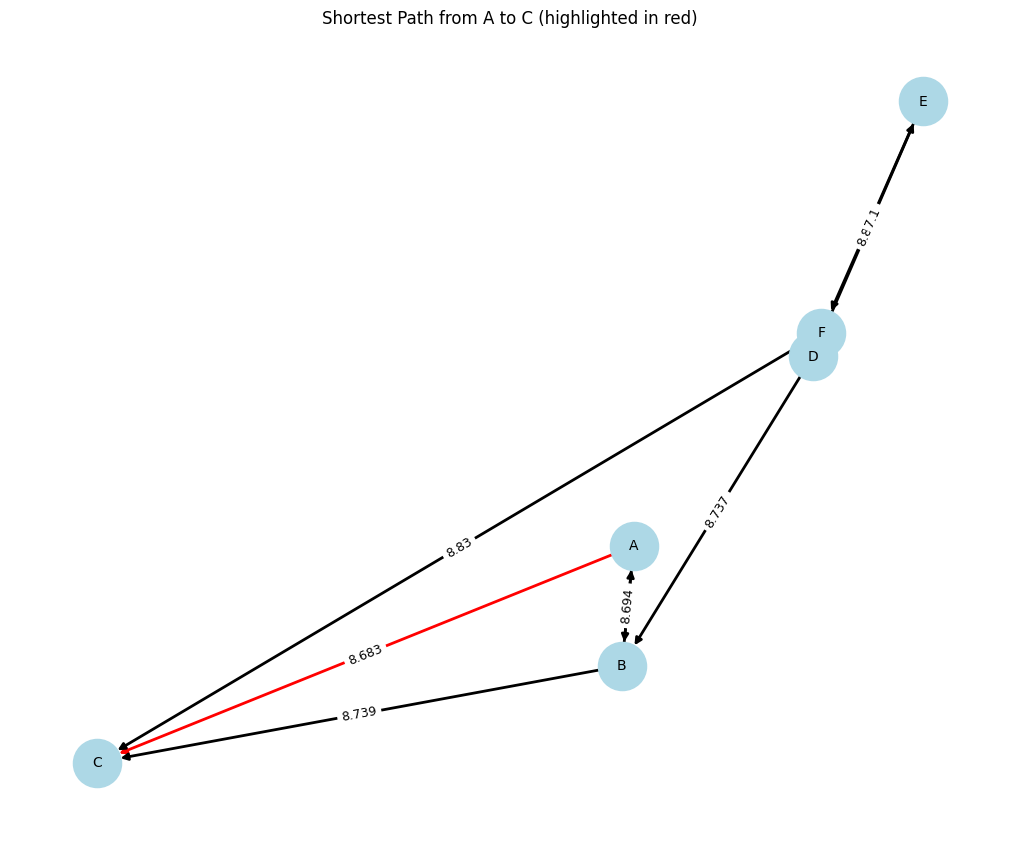

In [205]:
if path:
    edge_list = list(zip(path[:-1], path[1:]))
    edge_colors = ['red' if edge in edge_list or (edge[1], edge[0]) in edge_list else 'black' for edge in updated_G.edges()]
    plt.figure(figsize=(10, 8))
    nx.draw(updated_G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=10, arrows=True, edge_color=edge_colors, width=2)
    nx.draw_networkx_edge_labels(updated_G, pos, edge_labels=rounded_weights, font_size=9)
    plt.title(f"Shortest Path from {start_node} to {goal_node} (highlighted in red)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No path to visualize")



In [206]:

import pickle
import csv

# Save Graph
nx.write_graphml(updated_G, "road_network.graphml")
with open("road_network.pkl", "wb") as f:
    pickle.dump(updated_G, f)

# Save edge weights CSV
with open('edge_weights.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['from', 'to', 'weight'])
    for u, v, data in updated_G.edges(data=True):
        weight = data.get('weight', None)
        writer.writerow([u, v, weight])

# Assuming you have path & cost from your shortest path algo
path, cost = find_shortest_path(updated_G, 'A', 'C')  # change as needed
with open('path_result.txt', 'w') as f:
    if path:
        f.write(f"Shortest Path: {' -> '.join(path)}\nTotal Cost: {cost}\n")
    else:
        f.write("No path found\n")

# Save graph image
plt.savefig('road_network.png', dpi=300)



A* Path from A to C: ['A', 'C'] with cost 8.682794451713562


<Figure size 640x480 with 0 Axes>

In [222]:
def calculate_node_risks_proportional(graph, max_cap=1000):
    # Cap all edge weights to max_cap before calculating max_weight
    capped_weights = [
        min(graph[u][v].get('weight', 1), max_cap)
        for u, v in graph.edges
    ]
    max_weight = max(capped_weights) if capped_weights else 1

    risks = {}
    for node in graph.nodes:
        neighbors = list(graph.neighbors(node))
        if not neighbors:
            risks[node] = 0
            continue
        risk_score = 0
        for neighbor in neighbors:
            edge_weight = graph[node][neighbor].get('weight', 1)
            weight_to_use = min(edge_weight, max_cap)
            risk_score += weight_to_use / max_weight
        risk_score /= len(neighbors)  # average risk per node
        risks[node] = min(risk_score, 1.0)
    return risks

def print_node_risks(graph):
    risks = calculate_node_risks_proportional(graph)
    print("Node Risks:")
    for node, risk in risks.items():
        print(f"Node {node}: Risk = {risk:.3f}")

# After building your graph with weights, run:
print_node_risks(updated_G)


Node Risks:
Node A: Risk = 0.009
Node B: Risk = 0.009
Node C: Risk = 0.000
Node F: Risk = 0.504
Node D: Risk = 0.009
Node E: Risk = 0.007


In [223]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


def visualize_graph_with_risks(graph):
    risks = calculate_node_risks_proportional(graph)

    # Normalize risk values for coloring 0 (green) -> 1 (red)
    risk_values = np.array(list(risks.values()))
    norm = plt.Normalize(vmin=0, vmax=max(risk_values))

    # Choose a colormap
    cmap = cm.get_cmap('RdYlGn_r')  # reversed so red = high risk

    # Map risk to colors
    node_colors = [cmap(norm(risks[node])) for node in graph.nodes]

    pos = nx.spring_layout(graph, seed=42)  # consistent layout

    plt.figure(figsize=(8, 6))
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=800)
    nx.draw_networkx_labels(graph, pos, font_color='black', font_weight='bold')

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Node Risk (0 low - 1 high)')

    plt.title("Graph Visualization with Node Risks")
    plt.axis('off')
    plt.show()

# Example usage:
# visualize_graph_with_risks(updated_G)


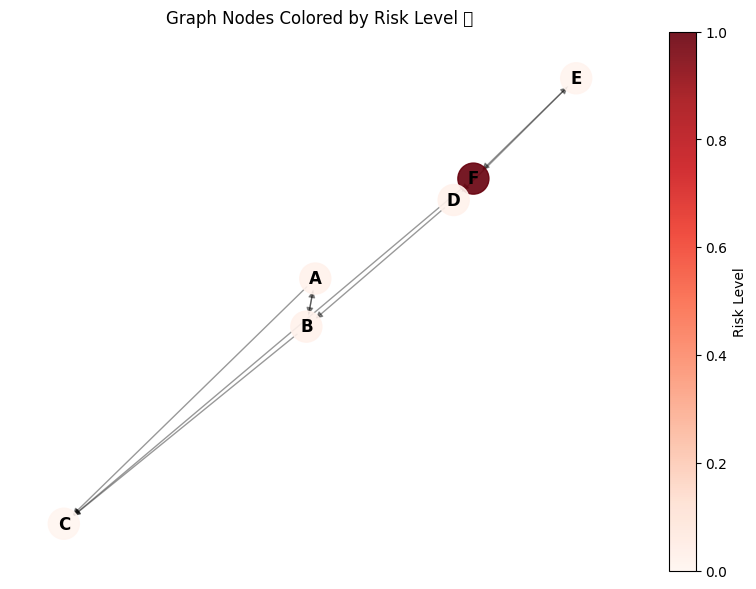

In [221]:

plot_graph_with_risks(updated_G, risks)


Node priorities based on average connected edge risk:
Node 1: 0.600
Node 3: 0.567
Node 2: 0.550
Node 4: 0.300


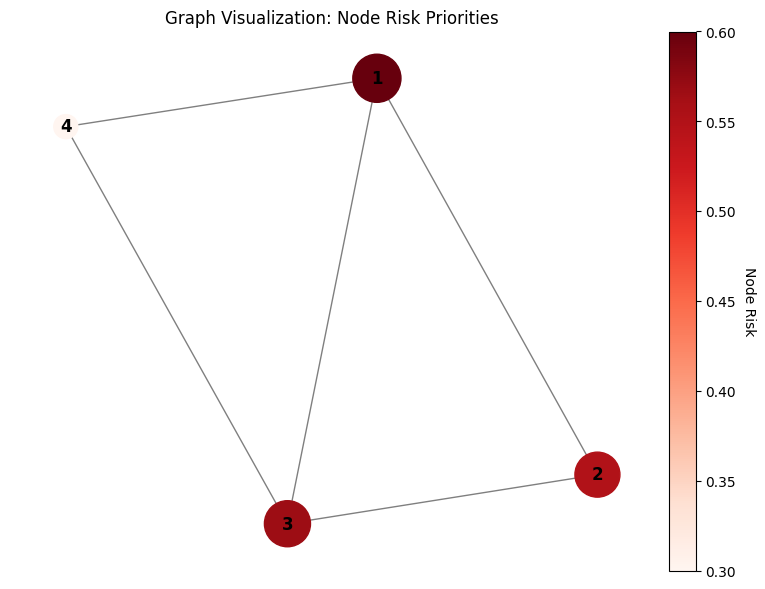

In [210]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

def prioritize_nodes_by_risk(G, combined_risks, method='mean'):
    node_risks = defaultdict(list)

    for edge in G.edges:
        if edge in combined_risks:
            risk = combined_risks[edge]
        elif (edge[1], edge[0]) in combined_risks:
            risk = combined_risks[(edge[1], edge[0])]
        else:
            risk = 0
        
        node_risks[edge[0]].append(risk)
        node_risks[edge[1]].append(risk)

    aggregated_node_risks = {}
    for node, risks in node_risks.items():
        if risks:
            if method == 'mean':
                aggregated_node_risks[node] = sum(risks) / len(risks)
            elif method == 'sum':
                aggregated_node_risks[node] = sum(risks)
            elif method == 'max':
                aggregated_node_risks[node] = max(risks)
        else:
            aggregated_node_risks[node] = 0

    sorted_nodes = sorted(aggregated_node_risks.items(), key=lambda x: x[1], reverse=True)
    return sorted_nodes

def visualize_node_risk(G, node_risks):
    risks = [node_risks.get(n, 0) for n in G.nodes()]
    max_risk = max(risks) if risks else 1
    min_risk = min(risks) if risks else 0

    norm_risks = [(r - min_risk) / (max_risk - min_risk + 1e-6) for r in risks]

    node_colors = [plt.cm.Reds(norm) for norm in norm_risks]
    node_sizes = [300 + norm * 900 for norm in norm_risks]

    pos = nx.spring_layout(G, seed=42)
    fig, ax = plt.subplots(figsize=(10, 7))
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=min_risk, vmax=max_risk))
    sm.set_array([])

    cbar = fig.colorbar(sm, ax=ax, label='Node Risk', orientation='vertical', pad=0.02)
    cbar.ax.yaxis.label.set_rotation(270)
    cbar.ax.yaxis.label.set_verticalalignment('bottom')

    ax.set_title("Graph Visualization: Node Risk Priorities")
    ax.axis('off')
    plt.show()


# TEST DATA (super simple example)
G = nx.Graph()
G.add_edges_from([
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 1),
    (1, 3)
])

combined_risks = {
    (1, 2): 0.4,
    (2, 3): 0.7,
    (3, 4): 0.1,
    (4, 1): 0.5,
    (1, 3): 0.9
}

node_priority = prioritize_nodes_by_risk(G, combined_risks, method='mean')
node_risks_dict = dict(node_priority)

print("Node priorities based on average connected edge risk:")
for node, risk in node_priority:
    print(f"Node {node}: {risk:.3f}")

visualize_node_risk(G, node_risks_dict)
